<h1> Main Idea</h1>

**Bagging**, **random forests**, and **boosting** involves producing multiple trees which are then combined to yield a single consensus prediction. We will see that combining a large number of trees can often result in dramatic improvements in prediction accuracy, at the expense of some loss in interpretation.

```
Boston.csv

A data frame containing 506 observations on housing values of suburbs in Boston and the following 14 variables:

crim    per capita crime rate by town.
zn      proportion of residential land zoned for lots over 25,000 sq.ft.
indus   proportion of non-retail business acres per town.
chas    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox     nitrogen oxides concentration (parts per 10 million).
rm      average number of rooms per dwelling.
age     proportion of owner-occupied units built prior to 1940.boxcox 21
dis     weighted mean of distances to five Boston employment centres.
rad     index of accessibility to radial highways.
tax     full-value property-tax rate per $10,000.
ptratio pupil-teacher ratio by town.
black   1000(Bk − 0.63)2 where Bk is the proportion of blacks by town.
lstat   lower status of the population (percent).
medv    median value of owner-occupied homes in $1000s
```

In [1]:
import pydot
from IPython.display import Image
from six import StringIO  
from sklearn.tree import export_graphviz

# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [2]:
import pandas as pd
boston_df = pd.read_csv('https://r-data.pmagunia.com/system/files/datasets/dataset-70319.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

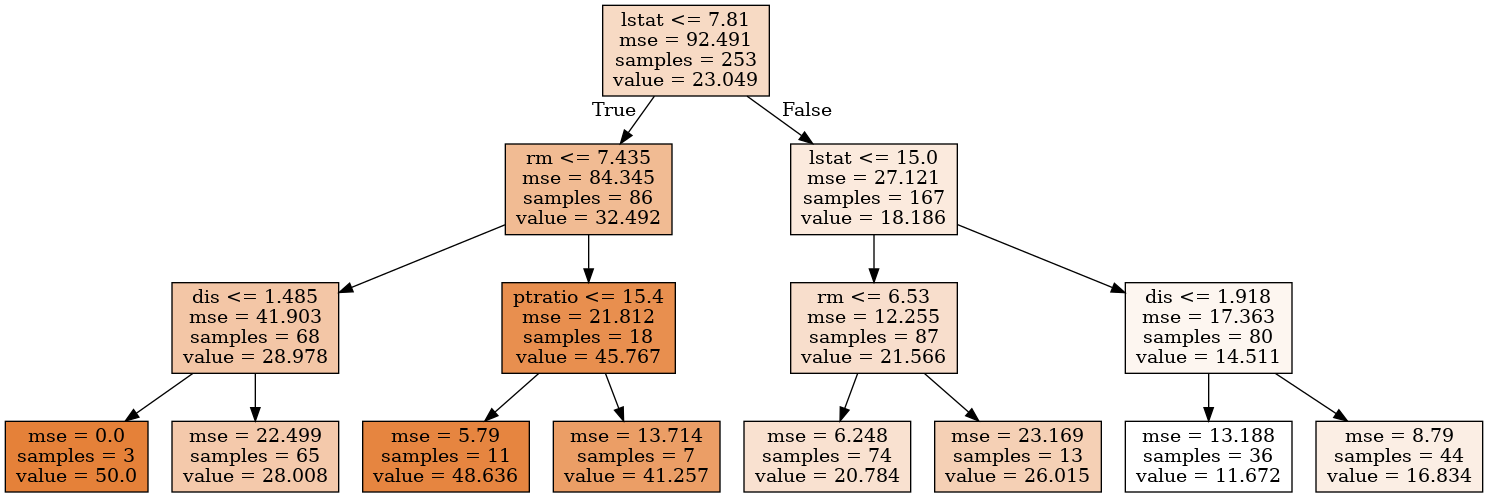

In [5]:
graph = print_tree(regr, features=X.columns)
Image(graph.create_png())

Text(0, 0.5, 'y_test')

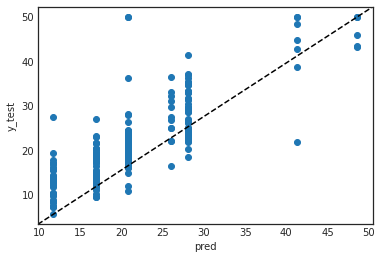

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

26.02323085009745

<h2>Bagging & Random Forest</h2>

In [8]:
# There are 13 features in the dataset
X.shape

(506, 13)

In [9]:
# Bagging: using all features
from sklearn.ensemble import RandomForestRegressor
regrf = RandomForestRegressor(max_features=13, random_state=1)
regrf.fit(X_train, y_train)

RandomForestRegressor(max_features=13, random_state=1)

Text(0, 0.5, 'y_test')

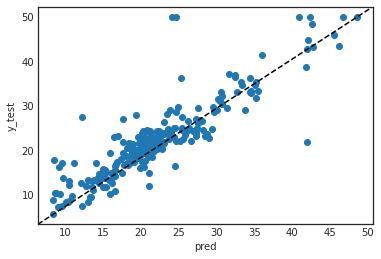

In [10]:
pred = regrf.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [11]:
mean_squared_error(y_test, pred)

16.17512869960475

In [12]:
# Random forests: using 6 features
regrf2 = RandomForestRegressor(max_features=6, random_state=1)
regrf2.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=1)

In [13]:
pred = regrf2.predict(X_test)
mean_squared_error(y_test, pred)

15.82350045849802

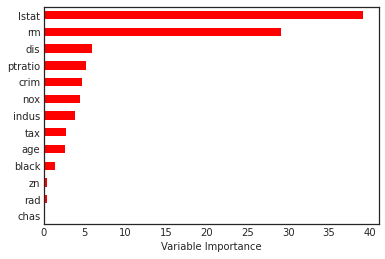

In [14]:
Importance = pd.DataFrame({'Importance':regrf2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

<h2>Boosting</h2>

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
regb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

zn          0.013059
chas        0.121257
rad         0.153199
black       0.460309
indus       0.576559
nox         0.731767
age         0.922677
tax         1.098078
crim        2.799589
ptratio     4.370389
dis         5.896297
rm         27.934202
lstat      54.922618
dtype: float64


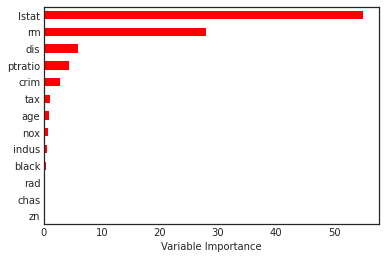

In [16]:
feature_importance = regb.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [17]:
mean_squared_error(y_test, regr.predict(X_test))

26.02323085009745